# Project 04 

The dataset we chose for this project is 'Spending and Revenue' for the city of San Francisco.
The San Francisco Controller's Office maintains a database of spending and revenue data sourced from it's citywide financial system. This data can be accessed from https://data.sfgov.org/City-Management-and-Ethics/Spending-and-Revenue/bpnb-jwfb. 

We found this data interesting because it had great amount of transactions with multiple dimensions. Plus, new data is added on a weekly basis, and is available from fiscal year 2000 forward. Another advantage of this dataset was that it is clean and tidy. All columns are well-defined and null values are not common, which will aid us in our analysis. A look into the Spending and Revenue of government departments could help both the public and the government itself, get insights into how funds are being utilised and generated. This would lead to greater government accountability to the public and the insights required for self-appraisal for the government. 

This notebook is structured as follows:

Part I : 
* Initial exploration of the dataset 
* Discussion of questions and challenges

Part II :
* Data Wrangling : Creation of facts and dimensions

Part III:
* Analysis of Data and subsequent findings

(Bonus) Part IV :
* Comparison of Spending and Revenue with Budget data

## Part I

First, we download the data from our s3 bucket.

In [3]:
!wget https://s3.amazonaws.com/datamanagementcourse/_Known_Issue__Spending_and_Revenue.csv

--2018-12-10 15:23:33--  https://s3.amazonaws.com/datamanagementcourse/_Known_Issue__Spending_and_Revenue.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144128388 (137M) [text/csv]
Saving to: ‘_Known_Issue__Spending_and_Revenue.csv’

_Known_Issue__Spend 100%[===================>] 137.45M  47.6MB/s    in 2.9s    

2018-12-10 15:23:36 (47.6 MB/s) - ‘_Known_Issue__Spending_and_Revenue.csv’ saved [144128388/144128388]



Then we rename the file.

In [4]:
!mv '_Known_Issue__Spending_and_Revenue.csv' 'spending.csv'

We count the amount of rows in the csv file 

In [5]:
!wc -l spending.csv

564519 spending.csv


We check the column headers

In [6]:
!csvcut -n spending.csv

  1: ﻿Fiscal Year
  2: Revenue or Spending
  3: Related Gov’t Units
  4: Organization Group Code
  5: Organization Group
  6: Department Code
  7: Department
  8: Program Code
  9: Program
 10: Character Code
 11: Character
 12: Object Code
 13: Object
 14: Sub-object Code
 15: Sub-object
 16: Fund Type Code
 17: Fund Type
 18: Fund Code
 19: Fund
 20: Fund Category Code
 21: Fund Category
 22: Amount


Have a glance at the data, a few columns at a time

In [7]:
!head spending.csv| csvcut -c1-6 | csvlook

| ﻿Fiscal Year | Revenue or Spending | Related Gov’t Units | Organization Group Code | Organization Group | Department Code |
| ------------ | ------------------- | ------------------- | ----------------------- | ------------------ | --------------- |
|        1,999 | Revenue             |               False |                    True | Public Protection  | ADM             |
|        1,999 | Revenue             |               False |                    True | Public Protection  | ADM             |
|        1,999 | Revenue             |               False |                    True | Public Protection  | ADM             |
|        1,999 | Revenue             |               False |                    True | Public Protection  | ADM             |
|        1,999 | Revenue             |               False |                    True | Public Protection  | ADM             |
|        1,999 | Revenue             |               False |                    True | Public Protection  | ADM       

In [8]:
!head spending.csv| csvcut -c7-11 | csvlook

| Department                     | Program Code | Program                             | Character Code | Character                      |
| ------------------------------ | ------------ | ----------------------------------- | -------------- | ------------------------------ |
| ADM Gen Svcs Agency-City Admin | ASG          | Medical Examiner                    |            445 | Intergovernmental Rev-State    |
| ADM Gen Svcs Agency-City Admin | ASG          | Medical Examiner                    |            460 | Charges For Services           |
| ADM Gen Svcs Agency-City Admin | ASM          | Medical Examiner - Medical Services |            445 | Intergovernmental Rev-State    |
| ADM Gen Svcs Agency-City Admin | ASM          | Medical Examiner - Medical Services |            475 | Other Revenues                 |
| ADM Gen Svcs Agency-City Admin | AUA          | Animal Welfare                      |            420 | Licenses; Permits & Franchises |
| ADM Gen Svcs Agency-City Admin |

In [9]:
!head spending.csv| csvcut -c12-18 | csvlook

| Object Code | Object                        | Sub-object Code | Sub-object                   | Fund Type Code | Fund Type              | Fund Code |
| ----------- | ----------------------------- | --------------- | ---------------------------- | -------------- | ---------------------- | --------- |
|         448 | State - Other                 |         448,923 | Peace Officer Training       | 1G             | General Fund           | 1GAGF     |
|         460 | Public Safety Service Charges |         460,690 | Medical Examiner Fees        | 1G             | General Fund           | 1GAGF     |
|         448 | State - Other                 |         448,929 | State Mandated Cost - SB 90  | 1G             | General Fund           | 1GAGF     |
|         479 | Other Non-Operating Revenues  |         479,999 | Other Non-Operating Revenue  | 1G             | General Fund           | 1GAGF     |
|         420 | Other Licenses & Permits      |         420,911 | Dog License                 

In [10]:
!head spending.csv| csvcut -c19-22 | csvlook

| Fund         | Fund Category Code | Fund Category       |     Amount |
| ------------ | ------------------ | ------------------- | ---------- |
| General Fund |                  3 | Continuing Projects |   5,182.06 |
| General Fund |                  1 | Operating           | 181,015.22 |
| General Fund |                  1 | Operating           |  12,915.00 |
| General Fund |                  1 | Operating           |  12,243.69 |
| General Fund |                  1 | Operating           | 102,959.89 |
| General Fund |                  1 | Operating           |  58,948.98 |
| General Fund |                  1 | Operating           |  12,028.00 |
| Gift Fund    |                  4 | Grants              |  45,554.99 |
| General Fund |                  1 | Operating           |   5,030.00 |


Based on this view adn the dataset dictionary provided by the data source, we describe each of the columns in our dataset

 __General__
 1. Fiscal Year: An accounting period of 12 months which begins on July 1 and ends on June 30 the following year. 
 2. Revenue or Spending: whether the record is Revenue or Spending
 3. Related Gov’t Units: These are fiduciary funds and component units different in nature from the other funds and in City government. 
 22. Amount: The amount earned (Revenue) or spent (Spending) by the City and County of San Francisco.
  
__Related to  Organization__ 
  4. Organization Group Code: Code to uniquely identify an Org Group, which is a group of Departments. 
  5. Organization Group: Name of the Org Group
  6. Department Code: Code to uniquely identify a Department, the primary organizational unit used by the City.
  7. Department: Name of the Department
  8. Program Code: Code to uniquely identify a program, which identifies the services a department provides. 
  9. Program: Name of the program
  
__Related to Type of Record__ 
 10. Character Code: In the type  hierarchy, Character is the highest level. For example, salaries, benefits, contractual services are different characters
 11. Character: Name of the character
 12. Object Code: In the type hierarchy, Object is the middle level. For example, within the Salaries Character, Objects are 
Permanent Salaries, Temporary Salaries, and Overtime pay. 
 13. Object: Name of the object
 14. Sub-object Code: In the type hierarchy, Sub-object is the lowest level of detail. For instance, within the Overtime Object, Sub-object segregates overtime for nurses from overtime for police officers 
 15. Sub-object : Name of the Sub-object
 
__Related to Type of Fund__
 16. Fund Type Code: In the Fund hierarchy, Fund Type is the highest level, and is according to governmental accounting standards.
 17. Fund Type: Name of the Fund Type
 18. Fund Code: In the Fund hierarchy, Fund is the middle level. For example, within the Special Revenue Fund Type, there is Children’s Fund and the Open Space & Park Fund. 
 19. Fund: Name of the Fund
 20. Fund Category Code: In the Fund hierarchy, Fund Category is the lowest level. Within
Fund, Fund Categories group activity by their characteristics. eg. Operating, Annual Projects, Continuing Projects, Grants
 21. Fund Category: Name of the Fund Category

Since the data is too large for csvstat to work with, we use xsv to check summary statistics of each column.

In [11]:
!head spending.csv  | xsv stats | xsv table

field                    type     sum                 min                             max                                  min_length  max_length  mean                stddev
Fiscal Year              Integer  17991               1999                            1999                                 4           4           1999                0
Revenue or Spending      Unicode                      Revenue                         Revenue                              7           7                               
Related Gov’t Units      Unicode                      No                              No                                   2           2                               
Organization Group Code  Integer  9                   1                               1                                    1           1           1                   0
Organization Group       Unicode                      Public Protection               Public Protection                    17          17               

And check if there is any nulls in each column

Since our dataset is large, we will only check for nulls in the first 75000 rows. however this should give us a good indication.

In [12]:
!head -75000 spending.csv | csvstat --nulls

  1. ﻿Fiscal Year: False
  2. Revenue or Spending: False
  3. Related Gov’t Units: False
  4. Organization Group Code: False
  5. Organization Group: False
  6. Department Code: False
  7. Department: True
  8. Program Code: True
  9. Program: True
 10. Character Code: False
 11. Character: True
 12. Object Code: False
 13. Object: True
 14. Sub-object Code: False
 15. Sub-object: True
 16. Fund Type Code: False
 17. Fund Type: True
 18. Fund Code: False
 19. Fund: True
 20. Fund Category Code: False
 21. Fund Category: False
 22. Amount: False


__Our thoughts after initial exploration:__

We wanted to make sure we understood every column and that the data was ready for analysis. After a csvcut command, we can see the summary of each columns and we noted that: 
1. Some columns do have nulls. Since the number of rows with null values is not a high proportion of the total data, we chose to neglect those rows during our analysis. 
2. We found that the amount variable can range from negative to positive. The database also indicates that, while amount should be positive all the time,  there could be negative revenue entries and negative spending entries. After checking the database, we found that these are adjustments entrie aim to reflect accounting modification. So we decide to keep them and incorporate them in analysis.


__Questions we want to answer using this data:__

1. What was the distribution of spending across departments?
2. What is most of the money being spent on?
3. How has spending and revenue varied across the years?
4. Which funds are these amounts coming from?
5. Which organization group spend the most amount of money?

## Part II

Now, we load our data into a database

In [13]:
%load_ext sql

!dropdb --if-exists -U student project4

!createdb -U student project4

%sql postgresql://student@/project4

'Connected: student@project4'

Below is the star schema diagram that we chose to employ for this data.

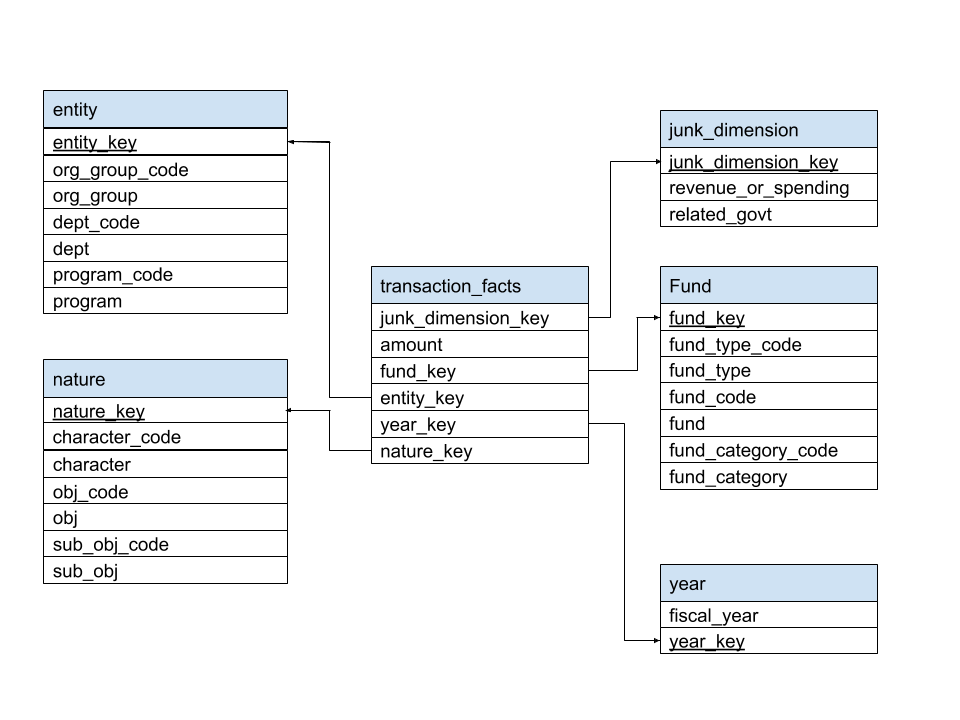

In [14]:
from IPython.display import Image
Image("https://s3.amazonaws.com/datamanagementcourse/project4schema.png")

We chose to have 5 dimension tables and 1 fact table since we only have one fact (amount).
Our dimensions are as follows:
* Entity : defines the codes and names for organisation group in the government and all the sub-categories within it.
* Nature : describes the codes and names for the nature of the record and all sub-categories within it
* Fund : describes the codes and names for type of fund and the sub-categores within it 
* Year : the details of the fiscal year 
* Junk_Dimension : since we couldn't find a clear category for revenue_or_Spending and related_govt, we chose to create a separate junk dimension for the two. 

First, we create the transaction fact table with all the variables in our csv file

In [15]:
%%sql
DROP TABLE IF EXISTS transaction_facts;

CREATE TABLE transaction_facts (
    fiscal_year INTEGER,
    revenue_or_spending VARCHAR(10),
    related_govt VARCHAR(5),
    org_group_code VARCHAR(5),
    org_group VARCHAR(50),
    dept_code VARCHAR(50),
    dept VARCHAR(50),
    program_code VARCHAR(50),
    program VARCHAR(50),
    character_code VARCHAR(50),
    character VARCHAR(50),
    obj_code VARCHAR(50),
    obj VARCHAR(50),
    sub_obj_code VARCHAR(50),
    sub_obj VARCHAR(50),
    fund_type_code VARCHAR(50),
    fund_type VARCHAR(50),
    fund_code VARCHAR(50),
    fund VARCHAR(50),
    fund_category_code DOUBLE PRECISION,
    fund_category VARCHAR(50),
    amount float(2)
)

 * postgresql://student@/project4
Done.
Done.


[]

Make sure your current working directory is home/ubuntu.

In [8]:
pwd

'/home/ubuntu'

Now we load our csv file into the created table

USE YOUR OWN LOCAL PATH!!!

In [16]:
%%sql
COPY transaction_facts FROM '/home/ubuntu/spending.csv'   
with (format csv, HEADER)

 * postgresql://student@/project4
564519 rows affected.


[]

As we can see, the count of the rows uploaded into our database is the same as in the csv file 

We delete rows if they contains one or more null values. Since we know which columns have null values, we only check those.

In [17]:
%%sql
DELETE FROM transaction_facts WHERE dept IS NULL
OR program_code IS NULL
OR program IS NULL
OR character IS NULL
OR obj_code IS NULL
OR obj IS NULL
OR sub_obj IS NULL
OR fund_type IS NULL
OR fund IS NULL
OR fund_category_code IS NULL
OR fund_category IS NULL
;

 * postgresql://student@/project4
45469 rows affected.


[]

We see that this is just 45469 out of 564519. Deleting less than 1% of total data does not affect our analysis significantly.

Then we count how many rows we have left.

In [18]:
%%sql
SELECT COUNT(*) FROM transaction_facts;

 * postgresql://student@/project4
1 rows affected.


count
519050


In [19]:
%%sql
SELECT * FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


fiscal_year,revenue_or_spending,related_govt,org_group_code,org_group,dept_code,dept,program_code,program,character_code,character,obj_code,obj,sub_obj_code,sub_obj,fund_type_code,fund_type,fund_code,fund,fund_category_code,fund_category,amount
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASG,Medical Examiner,445,Intergovernmental Rev-State,448,State - Other,448923,Peace Officer Training,1G,General Fund,1GAGF,General Fund,3.0,Continuing Projects,5182.06
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASG,Medical Examiner,460,Charges For Services,460,Public Safety Service Charges,460690,Medical Examiner Fees,1G,General Fund,1GAGF,General Fund,1.0,Operating,181015.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASM,Medical Examiner - Medical Services,445,Intergovernmental Rev-State,448,State - Other,448929,State Mandated Cost - SB 90,1G,General Fund,1GAGF,General Fund,1.0,Operating,12915.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASM,Medical Examiner - Medical Services,475,Other Revenues,479,Other Non-Operating Revenues,479999,Other Non-Operating Revenue,1G,General Fund,1GAGF,General Fund,1.0,Operating,12243.7
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare,420,Licenses; Permits & Franchises,420,Other Licenses & Permits,420911,Dog License,1G,General Fund,1GAGF,General Fund,1.0,Operating,102960.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare,460,Charges For Services,460,Humane Services,460501,Public Pound Fee,1G,General Fund,1GAGF,General Fund,1.0,Operating,58949.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare,460,Charges For Services,460,Humane Services,460502,Public Pound Sale Of Animals,1G,General Fund,1GAGF,General Fund,1.0,Operating,12028.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare,460,Charges For Services,460,Humane Services,460503,Public Donation,7E,Expendable Trust Funds,7EGIF,Gift Fund,4.0,Grants,45555.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare,460,Charges For Services,460,Humane Services,460505,Cat Registration,1G,General Fund,1GAGF,General Fund,1.0,Operating,5030.0
1999,Revenue,No,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare,460,Charges For Services,460,Humane Services,60504,Spay/Neuter Deposit,1G,General Fund,1GAGF,General Fund,1.0,Operating,7485.0


__Creating the junk dimension__

Now, we create the table for the junk dimension

In [20]:
%%sql
DROP TABLE IF EXISTS junk_dimension CASCADE;

CREATE TABLE junk_dimension (
    junk_dimension_key SERIAL PRIMARY KEY,
    revenue_or_spending VARCHAR(10),
    related_govt VARCHAR(5)
);

 * postgresql://student@/project4
Done.
Done.


[]

And insert distinct combination of two columns to this dimension.

In [21]:
%%sql
INSERT INTO junk_dimension (revenue_or_spending,related_govt)
SELECT DISTINCT revenue_or_spending, related_govt
FROM transaction_facts
;

 * postgresql://student@/project4
4 rows affected.


[]

Check how many different types of junk_dimension_key there are.

In [22]:
%%sql
SELECT * FROM junk_dimension LIMIT 10;

 * postgresql://student@/project4
4 rows affected.


junk_dimension_key,revenue_or_spending,related_govt
1,Spending,Yes
2,Revenue,Yes
3,Revenue,No
4,Spending,No


That looks good to us. Then we add junk_dimension_key, which is the surrogate key in the table

In [23]:
%%sql
ALTER TABLE transaction_facts
ADD COLUMN junk_dimension_key INTEGER,
ADD CONSTRAINT fk_junk_dimension_key
    FOREIGN KEY (junk_dimension_key)
    REFERENCES junk_dimension (junk_dimension_key);

 * postgresql://student@/project4
Done.


[]

Update transaction_facts table. Assign a junk_dimension_key to each transaction.

In [24]:
%%sql
UPDATE transaction_facts
SET junk_dimension_key = junk_dimension.junk_dimension_key
FROM junk_dimension
WHERE junk_dimension.revenue_or_spending= transaction_facts.revenue_or_spending
    AND junk_dimension.related_govt = junk_dimension.related_govt 

 * postgresql://student@/project4
519050 rows affected.


[]

And examine whether each rows in transaction_facts have a junk_dimension_key now.

In [25]:
%%sql
SELECT junk_dimension_key FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


junk_dimension_key
3
3
3
3
3
3
3
3
3
3


__Creating fund dimension__

Now, we create the fund dimension

In [26]:
%%sql
DROP TABLE if exists fund CASCADE;

CREATE TABLE fund (
    fund_key SERIAL PRIMARY KEY,
    fund_type_code VARCHAR(5),
    fund_type VARCHAR(50),
    fund_code VARCHAR(6),
    fund VARCHAR(50),
    fund_category_code INTEGER,
    fund_category VARCHAR(50)
);

 * postgresql://student@/project4
Done.
Done.


[]

Insert different combinations of fund_type_code, fund_type, fund, fund_category_code, and fund_category into the newly created fund dimension table.

In [27]:
%%sql
INSERT INTO fund (fund_type_code,
    fund_type,
    fund_code,
    fund,
    fund_category_code,
    fund_category)
SELECT DISTINCT fund_type_code,
    fund_type,
    fund_code,
    fund,
    fund_category_code,
    fund_category
FROM transaction_facts
;

 * postgresql://student@/project4
267 rows affected.


[]

Check the first 10 rows

In [28]:
%%sql
SELECT * FROM fund LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


fund_key,fund_type_code,fund_type,fund_code,fund,fund_category_code,fund_category
1,1G,General Fund,1GAGF,General Fund,1,Operating
2,1G,General Fund,1GAGF,General Fund,2,Annual Projects
3,1G,General Fund,1GAGF,General Fund,3,Continuing Projects
4,1G,General Fund,1GAGF,General Fund,4,Grants
5,1G,General Fund,1GAGF,General Fund,5,Work Orders/Overhead
6,1G,General Fund,1GBSI,Budget Savings Incentive,3,Continuing Projects
7,1G,General Fund,1GLTD,Long Term Debt,3,Continuing Projects
8,1G,General Fund,1GOHF,Overhead Fund,5,Work Orders/Overhead
9,1G,General Fund,1GS&A,Subventions & Other Allocations Fund,1,Operating
10,1G,General Fund,1GS&A,Subventions & Other Allocations Fund,4,Grants


Looks good. We then add the surrogate key to the table.

In [29]:
%%sql
ALTER TABLE transaction_facts
ADD COLUMN fund_key INTEGER,
ADD CONSTRAINT fk_fund_key
    FOREIGN KEY (fund_key)
    REFERENCES fund (fund_key);

 * postgresql://student@/project4
Done.


[]

Update the transaction_facts table, add fund_key to every transactions.

In [30]:
%%sql
UPDATE transaction_facts
SET fund_key = fund.fund_key
FROM fund
WHERE transaction_facts.fund_type_code = fund.fund_type_code
    AND transaction_facts.fund_category_code = fund.fund_category_code
    AND transaction_facts.fund_code = fund.fund_code;

 * postgresql://student@/project4
519050 rows affected.


[]

Check the fund_key of first 10 rows

In [31]:
%%sql
SELECT fund_key FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


fund_key
135
1
1
1
50
222
73
43
1
104


__Creating year dimension__

Now, we create the fiscal year dimension. <br />**Since creating a surrogate key is similiar for every dimensions, we will not explain every query unless there is a need.

In [32]:
%%sql
DROP TABLE IF EXISTS year CASCADE;

CREATE TABLE year (
    year_key SERIAL PRIMARY KEY,
    fiscal_year INTEGER
);

 * postgresql://student@/project4
Done.
Done.


[]

In [33]:
%%sql
INSERT INTO year (fiscal_year)
SELECT DISTINCT fiscal_year
FROM transaction_facts
;

 * postgresql://student@/project4
19 rows affected.


[]

In [34]:
%%sql
SELECT * FROM year LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


year_key,fiscal_year
1,2010
2,2000
3,2006
4,2003
5,1999
6,2005
7,2013
8,2009
9,2004
10,2007


In [35]:
%%sql
ALTER TABLE transaction_facts
ADD COLUMN year_key INTEGER,
ADD CONSTRAINT fk_year_key
    FOREIGN KEY (year_key)
    REFERENCES year (year_key);

 * postgresql://student@/project4
Done.


[]

In [36]:
%%sql
UPDATE transaction_facts
SET year_key = year.year_key
FROM year
WHERE transaction_facts.fiscal_year = year.fiscal_year

 * postgresql://student@/project4
519050 rows affected.


[]

In [37]:
%%sql
SELECT year_key FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


year_key
5
5
6
5
5
5
5
5
5
5


__Creating the entity dimension__

Now, we create the dimension entity

In [38]:
%%sql
DROP TABLE IF EXISTS entity CASCADE;

CREATE TABLE entity (
    entity_key SERIAL PRIMARY KEY,
    org_group_code VARCHAR(5),
    org_group VARCHAR(50),
    dept_code VARCHAR(55),
    dept VARCHAR(50),
    program_code VARCHAR(5),
    program VARCHAR(50)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [39]:
%%sql
INSERT INTO entity (org_group_code,
    org_group,
    dept_code,
    dept,
    program_code,
    program)
SELECT DISTINCT org_group_code,
    org_group,
    dept_code,
    dept,
    program_code,
    program
FROM transaction_facts
;

 * postgresql://student@/project4
1210 rows affected.


[]

In [40]:
%%sql
SELECT * FROM entity LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


entity_key,org_group_code,org_group,dept_code,dept,program_code,program
1,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASG,Medical Examiner
2,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASM,Medical Examiner - Medical Services
3,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,ASN,Medical Examiner - Investigative Service
4,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AUA,Animal Welfare
5,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,AXX,No Program Defined
6,1,Public Protection,ADM,ADM Gen Svcs Agency-City Admin,XXX,No Program Defined
7,1,Public Protection,ADP,ADP Adult Probation,AIE,Work Orders & Grants
8,1,Public Protection,ADP,ADP Adult Probation,AKB,Community Services
9,1,Public Protection,ADP,ADP Adult Probation,AKG,Pre - Sentencing Investigation
10,1,Public Protection,ADP,ADP Adult Probation,AOS,One Stop Re Entry Services


In [41]:
%%sql
ALTER TABLE transaction_facts
ADD COLUMN entity_key INTEGER,
ADD CONSTRAINT fk_entity_key
    FOREIGN KEY (entity_key)
    REFERENCES entity (entity_key);

 * postgresql://student@/project4
Done.


[]

In [42]:
%%sql
UPDATE transaction_facts
SET entity_key = entity.entity_key
FROM entity
WHERE transaction_facts.org_group_code = entity.org_group_code
    AND transaction_facts.dept_code = entity.dept_code
    AND transaction_facts.program_code = entity.program_code;

 * postgresql://student@/project4
519050 rows affected.


[]

In [43]:
%%sql
SELECT entity_key FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


entity_key
46
50
152
153
155
158
159
162
167
196


__Creating the Nature dimension__

Now, we create the dimension Nature

In [44]:
%%sql
DROP TABLE IF EXISTS nature CASCADE;

CREATE TABLE nature (
    nature_key SERIAL PRIMARY KEY,
    character_code VARCHAR(5),
    character VARCHAR(50),
    obj_code VARCHAR(10),
    obj VARCHAR(50),
    sub_obj_code VARCHAR(10),
    sub_obj VARCHAR(50)
);

 * postgresql://student@/project4
Done.
Done.


[]

In [45]:
%%sql
INSERT INTO nature (
    character_code,
    character,
    obj_code ,
    obj,
    sub_obj_code,
    sub_obj)
SELECT DISTINCT   character_code,
    character,
    obj_code ,
    obj,
    sub_obj_code,
    sub_obj
FROM transaction_facts
;

 * postgresql://student@/project4
2466 rows affected.


[]

In [46]:
%%sql
SELECT * FROM nature LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


nature_key,character_code,character,obj_code,obj,sub_obj_code,sub_obj
1,406,Capital Contributions-Federal,411,Capital Grants Contra-Federal,411501,Capital Contributions-Federal
2,406,Capital Contributions-Others,412,Capital Contributions-Others,412001,Capital Contributions-Others
3,410,Property Taxes,410,Other Property Taxes,10914,Supplemental ERAF Allocation
4,410,Property Taxes,410,Other Property Taxes,10915,Successor Agency Excess For Redistrib.
5,410,Property Taxes,410,Other Property Taxes,410911,Eraf Property Tax Allocation
6,410,Property Taxes,410,Other Property Taxes,410912,Prop Tax In-LieuOfSales&UseTax
7,410,Property Taxes,410,Other Property Taxes,410913,Prop Tax In-LieuOfVehcleLicFee
8,410,Property Taxes,410,Other Property Taxes,410920,Prop Tax Ab 1290 Rda Passthrgh
9,410,Property Taxes,410,Other Property Taxes,410930,SB 813-5% Administrative Cost
10,410,Property Taxes,410,Other Property Taxes,410940,Prop Tax-Administrative Cost


In [47]:
%%sql
ALTER TABLE transaction_facts
ADD COLUMN nature_key INTEGER,
ADD CONSTRAINT fk_nature_key
    FOREIGN KEY (nature_key)
    REFERENCES nature (nature_key);

 * postgresql://student@/project4
Done.


[]

In [48]:
%%sql
UPDATE transaction_facts
SET nature_key = nature.nature_key
FROM nature
WHERE transaction_facts.character_code = nature.character_code
    AND transaction_facts.obj_code = nature. obj_code
    AND transaction_facts.sub_obj_code = nature.sub_obj_code;

 * postgresql://student@/project4
519050 rows affected.


[]

In [49]:
%%sql
SELECT nature_key FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


nature_key
1693
1526
1550
1554
1819
1510
1557
1492
1550
1558


Now that we have created our 4 dimensions, we can remove the unneccesary columns from our fact table and keep only amount and the surrogate keys of the 4 dimensions tables

In [50]:
%%sql
ALTER TABLE transaction_facts

DROP COLUMN fiscal_year,
DROP COLUMN revenue_or_spending,
DROP COLUMN related_govt,
DROP COLUMN org_group_code,
DROP COLUMN org_group,
DROP COLUMN dept_code,
DROP COLUMN dept,
DROP COLUMN program_code,
DROP COLUMN program,
DROP COLUMN character_code,
DROP COLUMN character,
DROP COLUMN obj_code,
DROP COLUMN obj,
DROP COLUMN sub_obj_code,
DROP COLUMN sub_obj,
DROP COLUMN fund_type_code,
DROP COLUMN fund_type,
DROP COLUMN fund_code,
DROP COLUMN fund,
DROP COLUMN fund_category_code,
DROP COLUMN fund_category;


 * postgresql://student@/project4
Done.


[]

In [51]:
%%sql
select * from transaction_facts limit 10;

 * postgresql://student@/project4
10 rows affected.


amount,junk_dimension_key,fund_key,year_key,entity_key,nature_key
423.51,4,97,5,283,1550
1742260.0,4,121,5,283,1558
10.09,4,121,5,284,1551
463.67,4,20,5,312,2039
11754.3,4,1,5,775,1502
566534.0,4,5,5,324,1559
11237.8,4,70,5,325,1521
928.8,4,136,5,334,1488
-655111.0,4,56,5,381,2022
8825.12,4,1,6,93,1865


## Part III

Based on the schema built in Part 2, we'd like to explore the dataset by looking at 3 main dimensions first over the year.
Our concerns include:

1. Overall understanding
<br> What's the trend of the spending and revenue over the year of San Fransico?

2. Entity
<br>  What are the top organization groups have the higest spending and revenue? 
<br>  And what are their trend over the years?

3. Nature
<br>  What are the top characters have the higest spending and revenue?
<br>  And what are their trend over the years?

4. Fund
<br>  What are the top fund types have the higest spending and revenue?
<br>  And what are their trend over the years?

### 1. Overall understanding 

In [52]:
%matplotlib inline

In [53]:
%%sql
SELECT Fiscal_year, SUM(amount) as total_spending
FROM transaction_facts
JOIN Year
  ON transaction_facts.year_key = Year.year_key
JOIN junk_dimension
  ON transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
WHERE revenue_or_spending = 'Spending'
GROUP BY Fiscal_year
ORDER BY Fiscal_year;

 * postgresql://student@/project4
19 rows affected.


fiscal_year,total_spending
1999,5706850000.0
2000,5953050000.0
2001,6403550000.0
2002,6450300000.0
2003,6683850000.0
2004,6552100000.0
2005,6515020000.0
2006,7032470000.0
2007,7875960000.0
2008,8320530000.0


<BarContainer object of 19 artists>

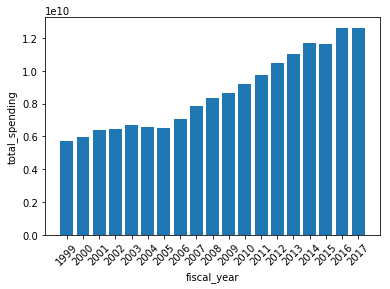

In [47]:
_.bar()

The total spending keeps steady until 2005 and experiences a continuous growth over the years

In [48]:
%%sql
SELECT Fiscal_year, SUM(amount) as total_revenue
FROM transaction_facts
JOIN Year
  ON transaction_facts.year_key = Year.year_key
JOIN junk_dimension
  ON transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
WHERE revenue_or_spending = 'Revenue'
GROUP BY Fiscal_year
ORDER BY Fiscal_year;

 * postgresql://student@/project4
19 rows affected.


fiscal_year,total_revenue
1999,5644990000.0
2000,7850450000.0
2001,5158190000.0
2002,5517740000.0
2003,6287360000.0
2004,6423900000.0
2005,7311940000.0
2006,8097360000.0
2007,8127790000.0
2008,8332800000.0


<BarContainer object of 19 artists>

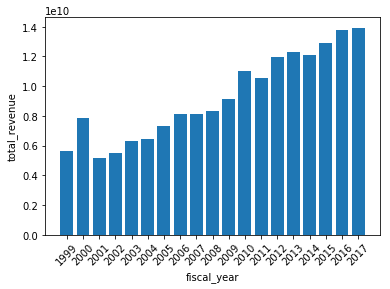

In [49]:
_.bar()

The total revenue had a plunge in 2001 and grows steadily ever since.

In [50]:
from IPython.display import Image
Image(url="https://s3.amazonaws.com/datamanagementcourse/Total+R%26S.png")  

The government has kept a balance of spending and revenue each year while the total amount has increased. The overall revenue is higher than the overall spending, which is good for the continual operation.

### 2. Entity

In [51]:
%%sql
select org_group, SUM(amount) as total_spending
from transaction_facts
join entity
on transaction_facts.entity_key = entity.entity_key 
join junk_dimension
on transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
where revenue_or_spending = 'Spending'
group by org_group
order by total_spending DESC

 * postgresql://student@/project4
7 rows affected.


org_group,total_spending
"Public Works, Transportation & Commerce",60070700000.0
General Administration & Finance,32236400000.0
Community Health,25391600000.0
Public Protection,20160300000.0
Human Welfare & Neighborhood Development,16384000000.0
General City Responsibilities,5638310000.0
Culture & Recreation,5184740000.0


<BarContainer object of 7 artists>

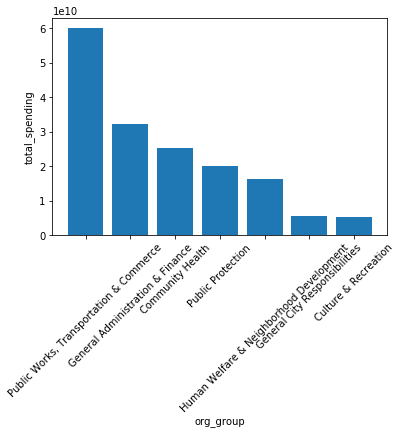

In [52]:
_.bar()

Public Works, Transportation & Commerce is the organization group that has the highest total spending, which almost doubles the second one of General Administration & Finance. Community Health holds the third place.

In [53]:
%%sql
select org_group, SUM(amount) as total_revenue
from transaction_facts
join entity
on transaction_facts.entity_key = entity.entity_key 
join junk_dimension
on transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
where revenue_or_spending = 'Revenue'
group by org_group
order by total_revenue DESC

 * postgresql://student@/project4
7 rows affected.


org_group,total_revenue
"Public Works, Transportation & Commerce",60067200000.0
General City Responsibilities,33875700000.0
General Administration & Finance,30722100000.0
Community Health,22894200000.0
Human Welfare & Neighborhood Development,19146800000.0
Public Protection,4979830000.0
Culture & Recreation,4759060000.0


<BarContainer object of 7 artists>

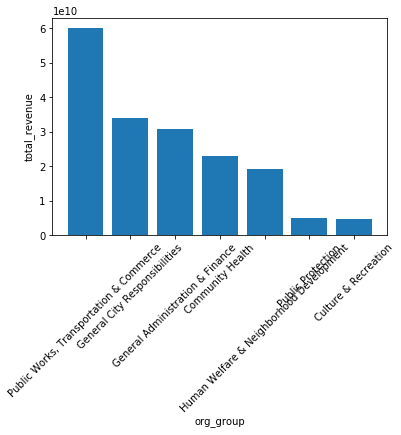

In [54]:
_.bar()

Public Works, Transportation & Commerce also have the highest revenue. Unlike the spending, the second organization is General City Responsibilities, the third is General Administration & Finance.

In [55]:
from IPython.display import Image
Image(url="https://s3.amazonaws.com/datamanagementcourse/Yearly+Revenue+and+Spending+by+Organization+Group.png")  

Overall the revenue and spending is in balance for most organization group. But the revenue of General City Responsibilities is always higher than its spending, while the spending of Public Protection is higher than its revenue over the years. We can also see that the dip in total 2001 revenue can be attributed to the dip in revenue from General Administration & Finance.

### 3. Nature

In [56]:
%%sql
select character, SUM(amount) as total_spending
from transaction_facts
join nature
on transaction_facts.nature_key = nature.nature_key 
join junk_dimension
on transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
where junk_dimension.revenue_or_spending = 'Spending'
group by character
order by total_spending DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


character,total_spending
Salaries,46353400000.0
Non Personnel Services,40788800000.0
Fiduciary-Benefit Payments,24173400000.0
Mandatory Fringe Benefits,16367100000.0
Intrafund Transfers Out,15929600000.0
Operating Transfers Out,14805900000.0
Debt Service,13500500000.0
Services Of Other Depts,11047300000.0
Capital Outlay,7379130000.0
Materials & Supplies,4956670000.0


<BarContainer object of 10 artists>

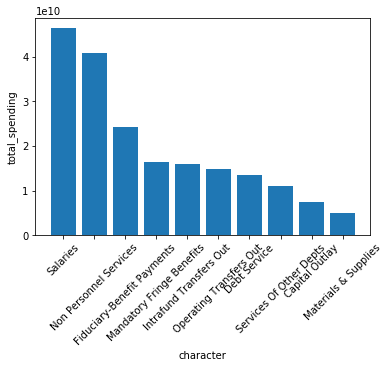

In [57]:
_.bar()

Salaries, Non Personnel Services, Fiduciary-Benefit Payments is the top 3 characters with the highest total spending.

In [58]:
%%sql
select character, SUM(amount) as total_revenue
from transaction_facts
join nature
on transaction_facts.nature_key = nature.nature_key 
join junk_dimension
on transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
where junk_dimension.revenue_or_spending = 'Revenue'
group by character
order by total_revenue DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


character,total_revenue
Charges For Services,49406200000.0
Property Taxes,30009700000.0
Intrafund Transfers In,15826900000.0
Intergovernmental Rev-State,15680300000.0
Operating Transfers In,15534800000.0
Other Financing Sources,15278800000.0
Expenditure Recovery,13853800000.0
Other Local Taxes,11697200000.0
Intergovernmental Rev-Federal,10671500000.0
Contribtns (Ret;Hss;Hlth Care),8284410000.0


<BarContainer object of 10 artists>

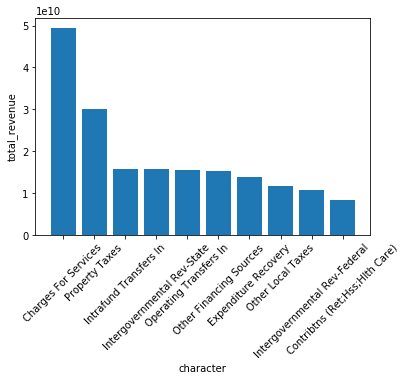

In [59]:
_.bar()

Charges For Services, Property Taxes and Intrafund Transfers In is the top 3 character with the highest total revenue.

In [60]:
from IPython.display import Image
Image(url="https://s3.amazonaws.com/datamanagementcourse/Yearly+Revenue+and+Spending+by+Character(10).png")  

Character is accounting term specially designed for revenue and spending, so there is not much comparison between them.

### 4. Fund

In [61]:
%%sql
select fund_type, SUM(amount) as total_spending
from transaction_facts
join fund
on transaction_facts.fund_key = fund.fund_key 
join junk_dimension
on transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
where junk_dimension.revenue_or_spending = 'Spending'
group by fund_type
order by total_spending DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


fund_type,total_spending
General Fund,44837700000.0
SF International Airport Funds,17070900000.0
Pension Trust Funds,15327000000.0
MTA Municipal Railway Funds,15102200000.0
Special Revenue Funds,13339600000.0
General Hospital Medical Center Funds,10808800000.0
Other Employee Benefit Trust Funds,10109200000.0
PUC Water Department Funds,9327910000.0
PUC Wastewater Funds,4737750000.0
Capital Projects Funds,4331310000.0


<BarContainer object of 10 artists>

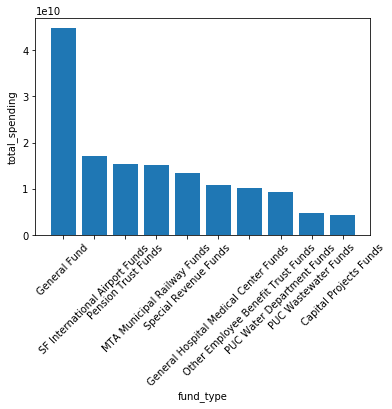

In [62]:
_.bar()

The spending amount that general fund raised takes up a large proportion of the fund type. Then it's SF International Airport Funds and Pension Trust Funds.

In [63]:
%%sql
select fund_type, SUM(amount) as total_revenue
from transaction_facts
join fund
on transaction_facts.fund_key = fund.fund_key 
join junk_dimension
on transaction_facts.junk_dimension_key = junk_dimension.junk_dimension_key
where junk_dimension.revenue_or_spending = 'Revenue'
group by fund_type
order by total_revenue DESC
LIMIT 10

 * postgresql://student@/project4
10 rows affected.


fund_type,total_revenue
General Fund,46499100000.0
SF International Airport Funds,16491800000.0
Pension Trust Funds,15558300000.0
MTA Municipal Railway Funds,15497600000.0
Special Revenue Funds,14290700000.0
General Hospital Medical Center Funds,10906400000.0
Other Employee Benefit Trust Funds,10202400000.0
PUC Water Department Funds,9584240000.0
Agency Funds,9499340000.0
PUC Wastewater Funds,4789470000.0


<BarContainer object of 10 artists>

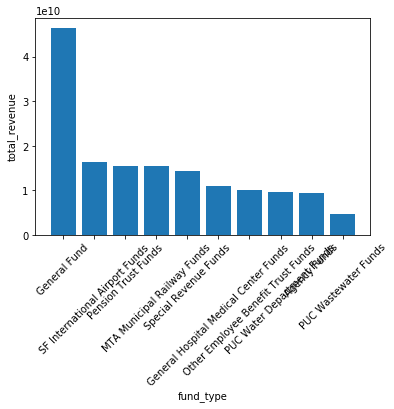

In [64]:
_.bar()

The revenue amount that general fund raised takes up a large proportion of the fund type. Similarly, then it's SF International Airport Funds and Pension Trust Funds.

In [65]:
from IPython.display import Image
Image(url="https://s3.amazonaws.com/datamanagementcourse/Yearly+Spending+and+Revenue+by+Fund+Type.png")  

We can again see a dip in 2001 We can also see that the dip in total 2001 revenue can be attributed to the dip in revenue from Pension Trust Funds. Matching this with the dip in organisation Group General Administration & Finance, we can see that there was some change in policy of Pensions Trust Funds within the General Administration & Finance organisation group

## (Bonus) Part IV

First, we download the dataset ‘Budget' for the city of San Francisco from our S3 bucket. This data can be assessed from https://data.sfgov.org/City-Management-and-Ethics/Budget-FTE/4zfx-f2ts. These two datasets have exactly the same structure. So we can easily compare the budget with acutual amount and generate more insights after introducing the budget dataset.

In [54]:
!wget https://s3.amazonaws.com/datamanagementcourse/Budget.csv  

--2018-12-10 15:34:32--  https://s3.amazonaws.com/datamanagementcourse/Budget.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.130.213
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.130.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36399927 (35M) [text/csv]
Saving to: ‘Budget.csv.1’

Budget.csv.1        100%[===================>]  34.71M  26.1MB/s    in 1.3s    

2018-12-10 15:34:34 (26.1 MB/s) - ‘Budget.csv.1’ saved [36399927/36399927]



In [55]:
!wc -l Budget.csv

140001 Budget.csv


In [56]:
!csvcut -n Budget.csv

  1: Fiscal Year
  2: Revenue or Spending
  3: Related Gov't Unit
  4: Organization Group Code
  5: Organization Group
  6: Department Code
  7: Department
  8: Program Code
  9: Program
 10: Character Code
 11: Character
 12: Object Code
 13: Object
 14: Sub-object Code
 15: Sub-object
 16: Fund Type Code
 17: Fund Type
 18: Fund Code
 19: Fund
 20: Fund Category Code
 21: Fund Category
 22: Amount


In [69]:
!head -n 75000 Budget.csv | csvstat --nulls

  1. Fiscal Year: False
  2. Revenue or Spending: False
  3. Related Gov't Unit: False
  4. Organization Group Code: False
  5. Organization Group: False
  6. Department Code: False
  7. Department: False
  8. Program Code: False
  9. Program: False
 10. Character Code: False
 11. Character: False
 12. Object Code: False
 13. Object: False
 14. Sub-object Code: False
 15. Sub-object: False
 16. Fund Type Code: False
 17. Fund Type: False
 18. Fund Code: False
 19. Fund: False
 20. Fund Category Code: True
 21. Fund Category: True
 22. Amount: False


We got several null values in the column of Fund Category Code and Fund Category. It's a small proportion of the dataset so we decided to drop those lines. 

First, we create the budget fact table with all the variables in our csv file.

In [57]:
%%sql
DROP TABLE IF EXISTS budget_facts;

CREATE TABLE budget_facts (
    fiscal_year INTEGER,
    revenue_or_spending VARCHAR(10),
    related_govt VARCHAR(5),
    org_group_code VARCHAR(5),
    org_group VARCHAR(50),
    dept_code VARCHAR(50),
    dept VARCHAR(50),
    program_code VARCHAR(50),
    program VARCHAR(50),
    character_code VARCHAR(50),
    character VARCHAR(50),
    obj_code VARCHAR(50),
    obj VARCHAR(50),
    sub_obj_code VARCHAR(50),
    sub_obj VARCHAR(50),
    fund_type_code VARCHAR(50),
    fund_type VARCHAR(50),
    fund_code VARCHAR(50),
    fund VARCHAR(50),
    fund_category_code DOUBLE PRECISION,
    fund_category VARCHAR(50),
    amount FLOAT(2)
)

 * postgresql://student@/project4
Done.
Done.


[]

Now we load our csv file into the created table

Make sure your current working directory is /home/ubuntu

In [71]:
pwd

'/home/ubuntu'

In [58]:
%%sql
COPY budget_facts FROM '/home/ubuntu/Budget.csv'
with (format csv, HEADER);

 * postgresql://student@/project4
140001 rows affected.


[]

Delete rows with null values based on csvstat result.

In [59]:
%%sql
DELETE FROM budget_facts WHERE 
fund_category_code IS NULL
OR fund_category IS NULL
;

 * postgresql://student@/project4
31 rows affected.


[]

In [60]:
%%sql
SELECT COUNT(*) FROM budget_facts;

 * postgresql://student@/project4
1 rows affected.


count
139970


By then, we have loaded all the budget data into the schema with no null values.

In [61]:
%%sql
SELECT * FROM budget_facts LIMIT 5;

 * postgresql://student@/project4
5 rows affected.


fiscal_year,revenue_or_spending,related_govt,org_group_code,org_group,dept_code,dept,program_code,program,character_code,character,obj_code,obj,sub_obj_code,sub_obj,fund_type_code,fund_type,fund_code,fund,fund_category_code,fund_category,amount
2013,Spending,No,6,General Administration & Finance,ASR,Assessor/Recorder,FDL,Technical Services,21,Non Personnel Services,31,Rents & Leases-Equipment,3131,Office Machine Rental,1G,General Fund,1GAGF,General Fund,1.0,Operating,28840.0
2015,Spending,No,3,Human Welfare & Neighborhood Development,DSS,Human Services,XXX,No Program Defined,ELU,Transfer Adjustments-Uses,ELU,Transfer Adjustments-Uses,ELIMUD,Transfer Adjustments-Uses,1G,General Fund,1GAGF,General Fund,1.0,Operating,-17045800.0
2013,Spending,No,6,General Administration & Finance,HRD,Human Resources,FDE,Workers Compensation,1,Salaries,1,Permanent Salaries-Misc,101,Misc-Regular,2S,Special Revenue Funds,2SGSF,General Services Fund,1.0,Operating,3547600.0
2016,Spending,No,5,Culture & Recreation,REC,Recreation and Park Commission,EAP,Parks,13,Mandatory Fringe Benefits,14,Social Security,1402,Social Security - Medicare (HI Only),1G,General Fund,1GAGF,General Fund,1.0,Operating,198703.0
2016,Spending,No,3,Human Welfare & Neighborhood Development,ENV,Environment,CIG,Environment,21,Non Personnel Services,35,Other Current Expenses,3581,Advertising,2S,Special Revenue Funds,2SENV,Environmental Protection Program Fund,1.0,Operating,598.0


We decided to store the budget data in another facts table and remain all the dimension tables. To do this, first we need to check if there is new dimension values in the budget dataset, then we add the surrogate key of the budget facts and drop extra columns.

#### Junk Dimension

Insert value into junk dimension table if not duplicate.

In [62]:
%%sql
INSERT INTO junk_dimension(revenue_or_spending,related_govt)
SELECT DISTINCT t1.revenue_or_spending, t1.related_govt
FROM budget_facts t1
WHERE NOT EXISTS
(SELECT revenue_or_spending,related_govt
FROM junk_dimension t2
WHERE t2.revenue_or_spending=t1.revenue_or_spending
AND t2.related_govt=t1.related_govt)
;

 * postgresql://student@/project4
0 rows affected.


[]

Since the possible values for Revenue or Spending and Related govt. unit is the same for both our datasets, Seems like there is no new value in the junk_dimension and thus we have 0 rows affected.

add fk to budget_facts table and add a new column junk_dimension_key

In [63]:
%%sql
ALTER TABLE budget_facts
ADD COLUMN junk_dimension_key INTEGER,
ADD CONSTRAINT fk_junk_dimension_key
    FOREIGN KEY (junk_dimension_key)
    REFERENCES junk_dimension (junk_dimension_key);

 * postgresql://student@/project4
Done.


[]

In [68]:
%%sql
UPDATE budget_facts
SET junk_dimension_key = junk_dimension.junk_dimension_key
FROM junk_dimension
WHERE junk_dimension.revenue_or_spending= budget_facts.revenue_or_spending
    AND junk_dimension.related_govt = budget_facts.related_govt 

 * postgresql://student@/project4
139970 rows affected.


[]

In [69]:
%%sql
SELECT junk_dimension_key FROM budget_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


junk_dimension_key
3
3
3
3
3
3
3
3
3
3


#### Fund Dimension

Insert value into fund dimension table if not duplicate.

In [70]:
%%sql
INSERT INTO fund(fund_type_code,fund_type,fund_code,
    fund,fund_category_code,fund_category)
SELECT DISTINCT t1.fund_type_code,t1.fund_type, t1.fund_code,
    t1.fund, t1.fund_category_code, t1.fund_category
FROM budget_facts t1
WHERE NOT EXISTS
(SELECT fund_type_code,fund_type,fund_code,
    fund,fund_category_code,fund_category
FROM fund t2
WHERE t2.fund_type_code=t1.fund_type_code
AND t2.fund_type=t1.fund_type
AND t2.fund_code=t1.fund_code
AND t2.fund=t1.fund
AND t2.fund_category_code=t1.fund_category_code
AND t2.fund_category=t1.fund_category)
;

 * postgresql://student@/project4
0 rows affected.


[]

add fk to budget_facts table and add a new column fund_key

In [71]:
%%sql
ALTER TABLE budget_facts
ADD COLUMN fund_key INTEGER,
ADD CONSTRAINT fk_fund_key
    FOREIGN KEY (fund_key)
    REFERENCES fund (fund_key);

 * postgresql://student@/project4
(psycopg2.ProgrammingError) column "fund_key" of relation "budget_facts" already exists
 [SQL: 'ALTER TABLE budget_facts\nADD COLUMN fund_key INTEGER,\nADD CONSTRAINT fk_fund_key\n    FOREIGN KEY (fund_key)\n    REFERENCES fund (fund_key);'] (Background on this error at: http://sqlalche.me/e/f405)


In [72]:
%%sql
UPDATE budget_facts
SET fund_key = fund.fund_key
FROM fund
WHERE budget_facts.fund_type_code = fund.fund_type_code
    AND budget_facts.fund_category_code = fund.fund_category_code
    AND budget_facts.fund_code = fund.fund_code;

 * postgresql://student@/project4
139970 rows affected.


[]

In [73]:
%%sql
SELECT fund_key FROM budget_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


fund_key
3
38
1
1
1
1
2
3
1
1


#### Year Dimension

Insert value into year dimension table if not duplicate.

In [74]:
%%sql
INSERT INTO year(fiscal_year)
SELECT DISTINCT t1.fiscal_year
FROM budget_facts t1
WHERE NOT EXISTS
(SELECT fiscal_year
FROM year t2
WHERE t2.fiscal_year=t1.fiscal_year)
;

 * postgresql://student@/project4
2 rows affected.


[]

Seems that we have two more year data in the budget facts.

add fk to budget_facts table and add a new column year_key

In [75]:
%%sql
ALTER TABLE budget_facts
ADD COLUMN year_key INTEGER,
ADD CONSTRAINT fk_year_key
    FOREIGN KEY (year_key)
    REFERENCES year (year_key);

 * postgresql://student@/project4
Done.


[]

In [76]:
%%sql
UPDATE budget_facts
SET year_key = year.year_key
FROM year
WHERE budget_facts.fiscal_year = year.fiscal_year

 * postgresql://student@/project4
139970 rows affected.


[]

In [77]:
%%sql
SELECT year_key FROM budget_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


year_key
11
16
15
13
7
13
18
16
16
18


#### Entity Dimension

Insert value into entity dimension table if not duplicate.

In [78]:
%%sql
INSERT INTO entity (org_group_code,org_group,dept_code,
    dept,program_code,program)
SELECT DISTINCT t1.org_group_code, t1.org_group,t1.dept_code,
    t1.dept,t1.program_code,t1.program
FROM budget_facts t1
WHERE NOT EXISTS
(SELECT org_group_code,org_group,dept_code,
    dept,program_code,program
FROM entity t2
WHERE t2.org_group_code = t1.org_group_code
AND t2.org_group = t1.org_group
AND t2.dept_code = t1.dept_code
AND t2.dept = t1.dept
AND t2.program_code = t1.program_code
AND t2.program = t1.program)
;

 * postgresql://student@/project4
482 rows affected.


[]

Looks like there are 482 new entities in the budget facts tables.

In [79]:
%%sql
ALTER TABLE budget_facts
ADD COLUMN entity_key INTEGER,
ADD CONSTRAINT fk_entity_key
    FOREIGN KEY (entity_key)
    REFERENCES entity (entity_key);

 * postgresql://student@/project4
Done.


[]

In [80]:
%%sql
UPDATE budget_facts
SET entity_key = entity.entity_key
FROM entity
WHERE budget_facts.org_group_code = entity.org_group_code
    AND budget_facts.dept_code = entity.dept_code
    AND budget_facts.program_code = entity.program_code;

 * postgresql://student@/project4
139970 rows affected.


[]

In [81]:
%%sql
SELECT entity_key FROM transaction_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


entity_key
93
408
472
472
490
492
521
523
531
775


#### Nature Dimension

Insert value into nature dimension table if not duplicate.

In [82]:
%%sql
INSERT INTO nature (character_code, character,obj_code,
                    obj,sub_obj_code,sub_obj)
SELECT DISTINCT t1.character_code, t1.character,t1.obj_code,
                t1.obj, t1.sub_obj_code, t1.sub_obj
FROM budget_facts t1
WHERE NOT EXISTS
(SELECT character_code, character,obj_code,
        obj,sub_obj_code,sub_obj
FROM nature t2
WHERE t2.character_code= t1.character_code
AND t2.character = t1.character
AND t2.obj_code = t1.obj_code
AND t2.obj = t1.obj
AND t2.sub_obj_code = t1.sub_obj_code
AND t2.sub_obj = t1.sub_obj)
;

 * postgresql://student@/project4
1392 rows affected.


[]

Looks like there are 1392 new natures in the budget facts tables.

In [83]:
%%sql
ALTER TABLE budget_facts
ADD COLUMN nature_key INTEGER,
ADD CONSTRAINT fk_nature_key
    FOREIGN KEY (nature_key)
    REFERENCES nature (nature_key);

 * postgresql://student@/project4
Done.


[]

In [84]:
%%sql
UPDATE budget_facts
SET nature_key = nature.nature_key
FROM nature
WHERE budget_facts.character_code = nature.character_code
    AND budget_facts.obj_code = nature. obj_code
    AND budget_facts.sub_obj_code = nature.sub_obj_code;

 * postgresql://student@/project4
139970 rows affected.


[]

In [85]:
%%sql
SELECT nature_key FROM budget_facts LIMIT 10;

 * postgresql://student@/project4
10 rows affected.


nature_key
2725
3858
3350
3074
2589
2305
3858
3350
3420
3858


we can remove the unneccesary columns from our fact table and keep only amount and the surrogate keys of the 4 dimensions tables

In [86]:
%%sql
ALTER TABLE budget_facts

DROP COLUMN fiscal_year,
DROP COLUMN revenue_or_spending,
DROP COLUMN related_govt,
DROP COLUMN org_group_code,
DROP COLUMN org_group,
DROP COLUMN dept_code,
DROP COLUMN dept,
DROP COLUMN program_code,
DROP COLUMN program,
DROP COLUMN character_code,
DROP COLUMN character,
DROP COLUMN obj_code,
DROP COLUMN obj,
DROP COLUMN sub_obj_code,
DROP COLUMN sub_obj,
DROP COLUMN fund_type_code,
DROP COLUMN fund_type,
DROP COLUMN fund_code,
DROP COLUMN fund,
DROP COLUMN fund_category_code,
DROP COLUMN fund_category;


 * postgresql://student@/project4
Done.


[]

In [87]:
%%sql
select * from budget_facts limit 10;

 * postgresql://student@/project4
10 rows affected.


amount,junk_dimension_key,fund_key,year_key,entity_key,nature_key
6800420.0,3,3,16,1274,3858
6035220.0,3,1,16,786,3391
1650000.0,3,1,18,893,3350
32438900.0,3,1,13,1224,3858
1000000.0,3,1,11,72,3258
30000.0,3,1,19,72,3254
903412.0,3,1,16,789,3373
2488000.0,3,1,13,888,3339
660089.0,3,1,11,1029,2378
10000.0,3,1,13,8,3160


Till now we have added our budget facts.

### Some explorations on the additional data source


Each query takes at least 10 mins, be careful to execute!

First, we want to know each year's budget and actual amount of spending and revenue and see if they're in similar trend.

In [98]:
%%sql
SELECT Fiscal_year, SUM(transaction_facts.amount) Total_rs, SUM(budget_facts.amount) Total_bud
FROM transaction_facts
JOIN Year
  ON transaction_facts.year_key = Year.year_key
JOIN budget_facts
  ON budget_facts.year_key = Year.year_key
GROUP BY Fiscal_year
ORDER BY Fiscal_year;

 * postgresql://student@/project4
8 rows affected.


fiscal_year,total_rs,total_bud
2010,221893000000000.0,297840000000000.0
2011,222761000000000.0,296146000000000.0
2012,245842000000000.0,307410000000000.0
2013,263137000000000.0,344009000000000.0
2014,275486000000000.0,369664000000000.0
2015,281359000000000.0,394185000000000.0
2016,301981000000000.0,420298000000000.0
2017,314051000000000.0,457073000000000.0


The total budget is higher than actual amount over years and both grows in steady pace.  

Then we want to figure out the yearly spending difference between bugdet and actual amount. 

In [99]:
%%sql
SELECT Fiscal_year, (SUM(budget_facts.amount)-SUM(transaction_facts.amount)) Diff
FROM transaction_facts
JOIN Year
  ON transaction_facts.year_key = Year.year_key
JOIN budget_facts
  ON budget_facts.year_key = Year.year_key
JOIN junk_dimension
  ON transaction_facts.junk_dimension_key=junk_dimension.junk_dimension_key
WHERE junk_dimension.revenue_or_spending = 'Spending'
GROUP BY Fiscal_year
ORDER BY Fiscal_year;

 * postgresql://student@/project4
8 rows affected.


fiscal_year,diff
2010,161586000000000.0
2011,151452000000000.0
2012,155146000000000.0
2013,176769000000000.0
2014,187709000000000.0
2015,209574000000000.0
2016,220315000000000.0
2017,248811000000000.0


<BarContainer object of 8 artists>

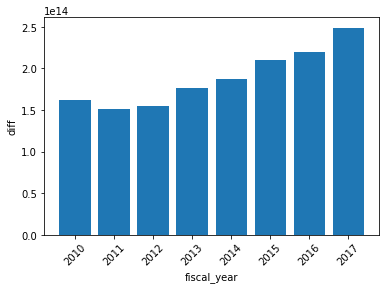

In [100]:
_.bar()

The difference between the budget spending and actual spending is huge and increases by year. This means there's a budget surplus which means yearly budget is higher than actual spending and revenue. 

Next we focus on the yearly revenue difference between budget and actual amount. 

In [88]:
%%sql
SELECT Fiscal_year, (SUM(transaction_facts.amount)-SUM(budget_facts.amount)) Diff
FROM transaction_facts
JOIN Year
  ON transaction_facts.year_key = Year.year_key
JOIN budget_facts
  ON budget_facts.year_key = Year.year_key
JOIN junk_dimension
  ON transaction_facts.junk_dimension_key=junk_dimension.junk_dimension_key
WHERE junk_dimension.revenue_or_spending = 'Revenue'
GROUP BY Fiscal_year
ORDER BY Fiscal_year;

 * postgresql://student@/project4
8 rows affected.


fiscal_year,diff
2010,88325300000000.0
2011,83084400000000.0
2012,97209800000000.0
2013,97082900000000.0
2014,92492500000000.0
2015,98641500000000.0
2016,105058000000000.0
2017,109309000000000.0


<BarContainer object of 8 artists>

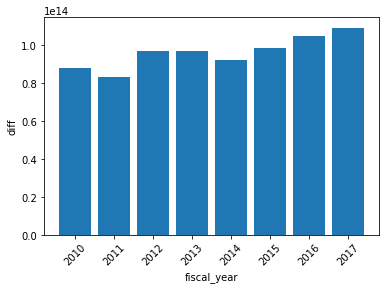

In [89]:
_.bar()

The difference between the budget revenue and actual revenue is still huge and decreases. The government underestimates its ability to generate revenue. Tying this together with our observation that we have a huge budget surplus every year, we have a theory that if the government can predict revenue generation better, it can assign the budget appropriately. However, since government budgets are notoriously complicated, we would need more data and some accounting and public policy knowledge to be able to substantiate our claim. 

# Attestation

We attest that all the work in this notebook was done by our group alone. 
While Haofu and Nupur handled parts 1 and 2 of data selction and wrangling, Jiaqi and Haoning concentrated on parts 3 and 4. 
We all collaborated in selection of the dataset and major decisions in each part.